## 데이터 셋 불러오기

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:/portfolio/code/week5/day2/학생성적분포.csv')

## 기말고사 전, 중간고사, 과제점수, 생활 패턴을 활용한 A등급 예측 모델 제작

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib

### 변수 분할

In [3]:
X=df[['나이', '성별코드', '하루공부시간', 'SNS사용시간', '수면시간','과제','중간']]
y=df['A등급여부']

### 테스트, 훈련 세트 분할

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### 스케일링

In [6]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

### 성능 평가 함수 제작

1. 단일 test 세트 평가

In [7]:
def evaluate_single(name, model, X_tr, X_te):
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:, 1]

    print(f"[{name}] 단일 test셋 평가")
    print("정확도 :", accuracy_score(y_test, y_pred))
    print("정밀도 :", precision_score(y_test, y_pred, zero_division=0))
    print("재현율 :", recall_score(y_test, y_pred))
    print("F1 :", f1_score(y_test, y_pred))
    print("AUC :", roc_auc_score(y_test, y_proba))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

2. KFold 교차 검증 함수 제작

In [8]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def evaluate_kfold(name, model, X, y):
    print(f'[{name}] K-Fold 교차 검증 결과')

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    acc_scores = cross_val_score(model, X,y,cv=skf, scoring='accuracy')
    print('평균 정확도 :', acc_scores.mean())

    pre_scores = cross_val_score(model, X, y, cv=skf, scoring='precision')
    print('평균 정밀도 :', pre_scores.mean())

    re_scores=cross_val_score(model, X,y,cv=skf, scoring='recall')
    print('평균 재현율 :', re_scores.mean())

    f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
    print('평균 f1:', f1_scores.mean())

    roc_scores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    print('평균 AUC :', roc_scores.mean())

### 모델 학습
(로지스틱 회귀, 랜덤포레스트, 결정트리, XGBoost)

In [9]:
#로지스틱 회귀
logic=LogisticRegression(max_iter=1000, class_weight='balanced')
logic.fit(X_train_scaled, y_train)

#결정트리
dt=DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)

#랜덤포레스트
rf=RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

#xgboost
pos = sum(y==1)
neg = sum(y==0)
scale = neg / pos
xgb=XGBClassifier(scale_pos_weight=scale, eval_metric = 'logloss', random_state=42)
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


### 성능평가 지표 출력

**1. 로지스틱 회귀**

In [19]:
evaluate_single('로지스틱 회귀', logic, X_train_scaled, X_test_scaled)
evaluate_kfold('로지스틱 회귀', logic, X, y)

[로지스틱 회귀] 단일 test셋 평가
정확도 : 0.85
정밀도 : 0.4166666666666667
재현율 : 0.7142857142857143
F1 : 0.5263157894736842
AUC : 0.9110512129380054
Confusion matrix:
 [[46  7]
 [ 2  5]]
[로지스틱 회귀] K-Fold 교차 검증 결과
평균 정확도 : 0.86
평균 정밀도 : 0.3172222222222222
평균 재현율 : 0.85
평균 f1: 0.45728744939271254
평균 AUC : 0.91875


**2. 결정트리**

In [11]:
evaluate_single('결정트리', dt, X_train, X_test)
evaluate_kfold('결정트리', dt, X, y)

[결정트리] 단일 test셋 평가
정확도 : 0.9166666666666666
정밀도 : 0.75
재현율 : 0.42857142857142855
F1 : 0.5454545454545454
AUC : 0.7035040431266847
Confusion matrix:
 [[52  1]
 [ 4  3]]
[결정트리] K-Fold 교차 검증 결과
평균 정확도 : 0.9099999999999999
평균 정밀도 : 0.35777777777777775
평균 재현율 : 0.35
평균 f1: 0.33137973137973137
평균 AUC : 0.646875


**3. 랜덤포레스트**

In [12]:
evaluate_single('랜덤포레스트', rf, X_train, X_test)
evaluate_kfold('랜덤포레스트', rf, X, y)

[랜덤포레스트] 단일 test셋 평가
정확도 : 0.8833333333333333
정밀도 : 0.0
재현율 : 0.0
F1 : 0.0
AUC : 0.8827493261455526
Confusion matrix:
 [[53  0]
 [ 7  0]]
[랜덤포레스트] K-Fold 교차 검증 결과
평균 정확도 : 0.9266666666666667


c:\Users\kgh44\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


평균 정밀도 : 0.4
평균 재현율 : 0.1
평균 f1: 0.16
평균 AUC : 0.8178571428571428


**4. XGBoost**

In [13]:
evaluate_single('XGBoost', xgb, X_train, X_test)
evaluate_kfold('XGBoost', xgb, X, y)

[XGBoost] 단일 test셋 평가
정확도 : 0.8833333333333333
정밀도 : 0.5
재현율 : 0.2857142857142857
F1 : 0.36363636363636365
AUC : 0.8301886792452831
Confusion matrix:
 [[51  2]
 [ 5  2]]
[XGBoost] K-Fold 교차 검증 결과
평균 정확도 : 0.9066666666666666
평균 정밀도 : 0.35333333333333333
평균 재현율 : 0.35
평균 f1: 0.34476190476190477
평균 AUC : 0.8375


### 정밀도 재현율 트레이드오프 시각화

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def tradeoff_visual(name, model, X_te):
    y_scores=model.predict_proba(X_te)[:,1]

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

    matplotlib.rc('font', family='Malgun Gothic')
    plt.figure(figsize=(8,6))
    plt.plot(thresholds, precisions[:-1], 'b--', label='정밀도')
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율')
    plt.xlabel('Thresholds')
    plt.ylabel('score')
    plt.title(f'{name} 재현율 vs 정밀도 트레이드 오프')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

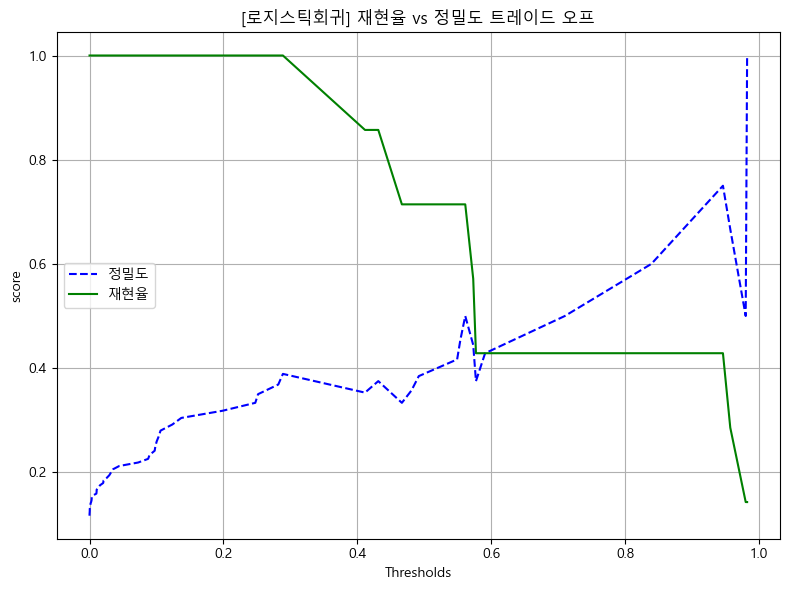

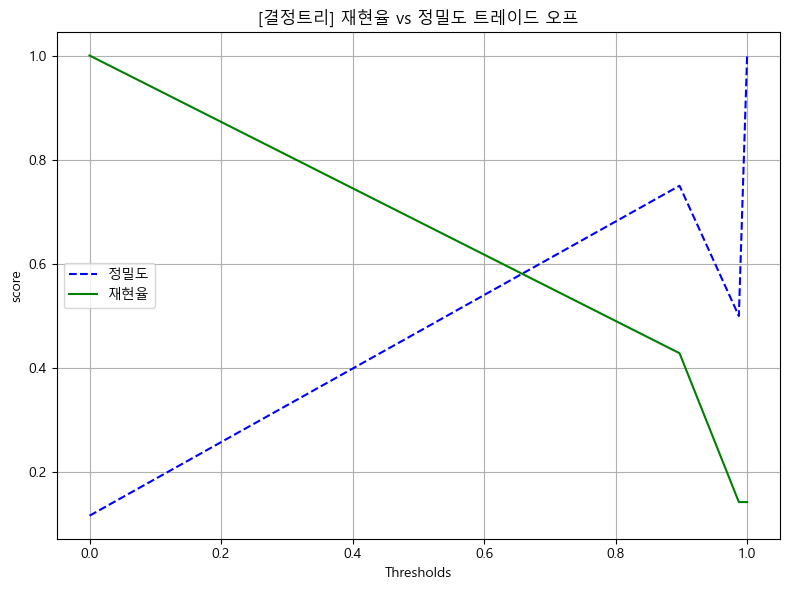

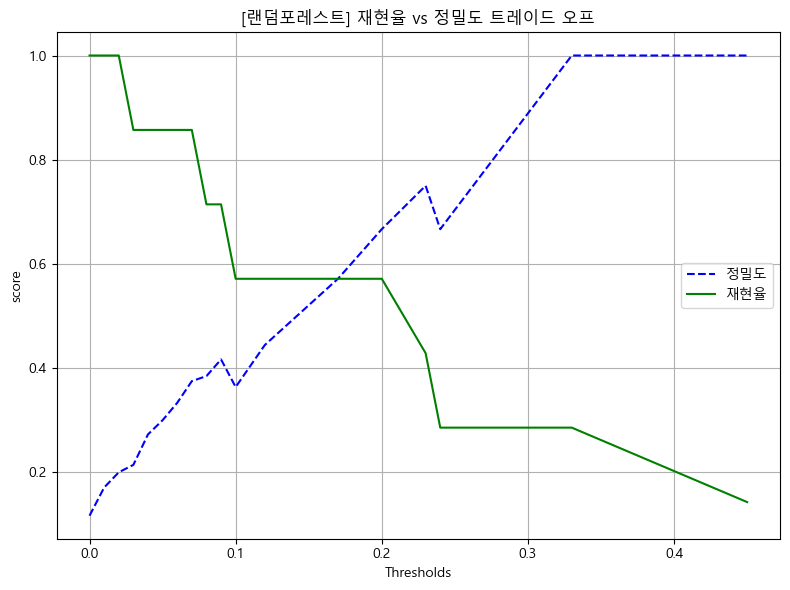

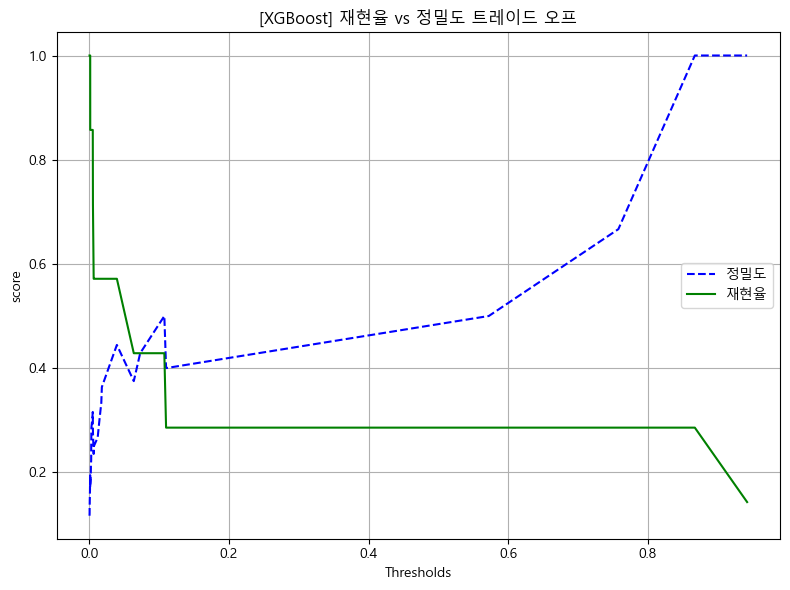

In [17]:
tradeoff_visual('[로지스틱회귀]', logic, X_test_scaled)
tradeoff_visual('[결정트리]', dt, X_test)
tradeoff_visual('[랜덤포레스트]', rf, X_test)
tradeoff_visual('[XGBoost]', xgb, X_test)